In [191]:
import numpy as np
import torch
import torch.nn as nn
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [140]:
trainX = np.load('mnist_trainX.npy')
trainY = np.load('mnist_trainY.npy')
testX=   np.load('mnist_testX.npy')
testY=   np.load('mnist_testY.npy')

In [141]:
print(trainX)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [142]:
print(trainY)
print(testX)

[5 0 4 ... 5 6 8]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [143]:
trainX.shape

(60000, 28, 28)

In [144]:
testX.shape

(10000, 28, 28)

In [145]:
trainY.shape

(60000,)

In [146]:
trainX = torch.Tensor(trainX)
trainY = torch.Tensor(trainY).long()
testX=   torch.Tensor(testX)
testY=   torch.Tensor(testY)

In [147]:
trainX.size()

torch.Size([60000, 28, 28])

In [164]:
class FFN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FFN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.sigmoid1 = nn.Sigmoid()
        
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.sigmoid2 = nn.Sigmoid()
        
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.sigmoid3 = nn.Sigmoid()
        
#         self.fc4 = nn.Linear(hidden_size, hidden_size)
#         self.sigmoid4 = nn.Sigmoid()
        
        self.fc4 = nn.Linear(hidden_size, output_size)

        
        
    def forward(self, x):
        z1 = self.fc1(x)
        a1 = self.sigmoid1(z1)
        z2 = self.fc2(a1)
        a2 = self.sigmoid2(z2)
        z3 = self.fc3(a2)
        a3 = self.sigmoid3(z3)
        z4=  self.fc4(a3)
#         a4 = self.sigmoid3(z4)
#         z5=  self.fc5(a4)
        
        return z4

In [165]:
model = FFN(784, 300, 10)
model.cuda()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [166]:
num_of_epochs = 100

In [167]:
batch_size = 100
for cur_epoch in range(num_of_epochs):
    total_loss = 0
    for sptr in range(0, trainX.shape[0], batch_size):
        eptr = sptr + batch_size
        curX = trainX[sptr:eptr].view(-1, 28*28).cuda()
        curY = trainY[sptr:eptr].cuda()
        optimizer.zero_grad()
        output = model.forward(curX)
        loss = criterion(output, curY)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    if cur_epoch % 10 == 0:
        print(cur_epoch, total_loss)


0 1381.1497383117676
10 1373.6563441753387
20 1363.5995585918427
30 1343.8849022388458
40 1296.393898487091
50 1175.487991452217
60 966.3441751003265
70 753.2390474081039
80 579.6556471586227
90 461.6420364975929


In [132]:
#Prediction
output = model.forward(testX.view(-1, 28*28).cuda())
_, preds = torch.max(output.data, dim=1)

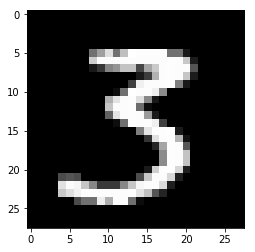

In [135]:
# Image at index indx
indx = 2045
plt.imshow(testX[indx].numpy(), cmap='gray')

In [136]:
# Label at index indx
print(preds[indx].item())

3


In [168]:
a3 = model.fc3(model.sigmoid2(model.fc2(model.sigmoid1(model.fc1(testX.view(-1, 28*28).cuda())))))

In [169]:
a3.size()

torch.Size([10000, 300])

In [170]:
from sklearn.decomposition import PCA

In [171]:
pca = PCA(n_components=2)

In [173]:
reduced_a3 = pca.fit_transform(a3.cpu().detach().numpy())

In [182]:
reduced_a3[0]

array([8.859772 , 5.4368916], dtype=float32)

In [184]:
np_a3 = np.array(reduced_a3)

In [185]:
np_a3.shape

(10000, 2)

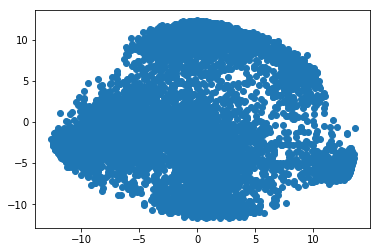

In [188]:
plt.scatter(np_a3[:,0], np_a3[:,1])

In [189]:
# color_map = ['r', 'g', 'b']
# for 
colors = ['red','green','blue','purple', 'orange', 'cyan', 'brown', 'black', 'yellow', 'pink']

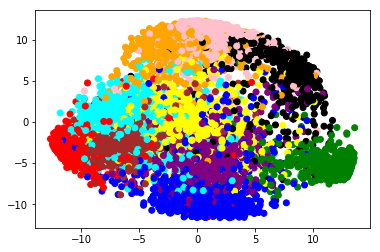

In [192]:
plt.scatter(np_a3[:,0], np_a3[:,1], c=testY.numpy(), cmap=matplotlib.colors.ListedColormap(colors))

In [194]:
for i in range(10):
    print(i, colors[i])

0 red
1 green
2 blue
3 purple
4 orange
5 cyan
6 brown
7 black
8 yellow
9 pink
